## 0. Objective

Dengan meningkatnya permintaan pasar dan persaingan ketat. Superstore Giant ingin memahami produk, wilayah, kategori, segmen pelanggan mana yang harus mereka targetkan. Oleh sebab itu mereka butuh bantuan untuk mencari insight dari data yang mereka punya.

Apa yang akan dilakukan:
1. Exploratory Data Analysis
2. RFM Segmentation

## 1. Load Dataset

In [26]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#import dataset
df = pd.read_csv('Superstore.csv', encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [29]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('')

Row ID have 9994 unique values: int64
Row ID values: [   1    2    3 ... 9992 9993 9994]

Order ID have 5009 unique values: object
Order ID values: ['CA-2013-152156' 'CA-2013-138688' 'US-2012-108966' ... 'CA-2011-110422'
 'CA-2014-121258' 'CA-2014-119914']

Order Date have 1238 unique values: object
Order Date values: ['09-11-2013' '13-06-2013' '11-10-2012' ... '04-06-2013' '12-04-2012'
 '22-01-2011']

Ship Date have 1334 unique values: object
Ship Date values: ['12-11-2013' '17-06-2013' '18-10-2012' ... '23-05-2012' '24-01-2011'
 '04-03-2014']

Ship Mode have 4 unique values: object
Ship Mode values: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Customer ID have 793 unique values: object
Customer ID values: ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'


Customer Name values: ['Claire Gute' 'Darrin Van Huff' "Sean O'Donnell" 'Brosina Hoffman'
 'Andrew Allen' 'Irene Maddox' 'Harold Pawlan' 'Pete Kriz'
 'Alejandro Grove' 'Zuschuss Donatelli' 'Ken Black' 'Sandra Flanagan'
 'Emily Burns' 'Eric Hoffmann' 'Tracy Blumstein' 'Matt Abelman'
 'Gene Hale' 'Steve Nguyen' 'Linda Cazamias' 'Ruben Ausman' 'Erin Smith'
 'Odella Nelson' "Patrick O'Donnell" 'Lena Hernandez' 'Darren Powers'
 'Janet Molinari' 'Ted Butterfield' 'Kunst Miller' 'Paul Stevenson'
 'Brendan Sweed' 'Karen Daniels' 'Henry MacAllister' 'Joel Eaton'
 'Ken Brennan' 'Stewart Carmichael' 'Duane Noonan' 'Julie Creighton'
 'Christopher Schild' 'Paul Gonzalez' 'Gary Mitchum' 'Jim Sink'
 'Karl Braun' 'Roger Barcio' 'Parhena Norris' 'Katherine Ducich'
 'Elpida Rittenbach' 'Rick Bensley' 'Gary Zandusky' 'Lena Cacioppo'
 'Janet Martin' 'Pete Armstrong' 'Cynthia Voltz' 'Clay Ludtke'
 'Ryan Crowe' 'Dave Kipp' 'Greg Guthrie' 'Steven Cartwright'
 'Alan Dominguez' 'Philip Fox' 'Troy Staebel' 'Lin

In [30]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
print(nums)
print('Data numerik:', len(nums), 'fitur')

['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Data numerik: 6 fitur


In [31]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
print(cats)
print('Data kategorikal: ', len(cats), 'fitur')

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Data kategorikal:  15 fitur


- Dataset terdiri dari **9994 record** dan **21 fitur** dengan **6 fitur bertipe data numerik** dan **15 fitur bertipe data kategorikal**
- **Order Date** dan **Ship Date** seharusnya bertipe data **Datetime**


In [32]:
#Cek null value
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

- Tidak ada null value

In [33]:
#cek duplicate
df.duplicated().sum()

0

- Tidak ada duplikasi data

In [34]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [35]:
df[cats].describe().T

,count,unique,top,freq
Order ID,9994,5009,CA-2014-100111,14
Order Date,9994,1238,06-09-2013,38
Ship Date,9994,1334,16-12-2012,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


- Produk terlaris yaitu staples
- Office supplies merupakan categroy produk paling banyak terjual
- William Brown adalah customer yang paling sering berbelanja

## 2. Data Cleaning

In [36]:
# drop columns row id
df = df.drop(columns=['Row ID'])

In [37]:
#Ubah order date menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%Y")
df['Ship Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%Y")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

## 3. Exploratory Data Analysis

### 3.1. Transaction Data

In [38]:
# backup dataset
df_transaction = df.copy()

Analisis mendalam pada **Order Date** dengan membaginya menjadi beberapa bagian yang spesifik

In [39]:
df_transaction['transaction_year'] = df_transaction['Order Date'].dt.strftime('%Y')
df_transaction['transaction_month'] = df_transaction['Order Date'].dt.strftime('%B')
df_transaction['transaction_quarter'] = df_transaction['Order Date'].dt.quarter.astype(str)
df_transaction['transaction_day'] = df_transaction['Order Date'].dt.strftime('%d')
df_transaction['transaction_weekday'] = df_transaction['Order Date'].dt.strftime('%A')
df_transaction.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,transaction_year,transaction_month,transaction_quarter,transaction_day,transaction_weekday
0,CA-2013-152156,2013-11-09,2013-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2013,November,4,09,Saturday
1,CA-2013-152156,2013-11-09,2013-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2013,November,4,09,Saturday
2,CA-2013-138688,2013-06-13,2013-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2013,June,2,13,Thursday


#### 3.1.1 Statistical Summary

In [40]:
# descriptive statistic
df_transaction[df_transaction.columns.tolist()[-5:]].describe().T

,count,unique,top,freq
transaction_year,9994,4,2014,3319
transaction_month,9994,12,November,1462
transaction_quarter,9994,4,4,3700
transaction_day,9994,31,21,402
transaction_weekday,9994,7,Friday,1837


- **Transaksi paling besar** terjadi di tahun **2014**
- **Transaksi bulanan terbesar** terjadi pada bulan **November**
- **Transaksi kuartal terbesar** terjadi pada **kuarter ke empat**
- **Transaksi harian terbesar** dalam sebulan biasanya terjadi pada **tanggal 21**
- **Transaksi harian terbesar** dalam seminggu biasanya terjadi pada **hari jumat**

#### 3.1.2 Number of Transaction per Month

In [41]:
# aggregate by month
transaction_per_month = df_transaction.groupby('transaction_month')['Order ID'].count().reset_index()
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,387
3,February,301
7,March,680
0,April,663
8,May,750
6,June,709
5,July,708
1,August,710
11,September,1386
10,October,817


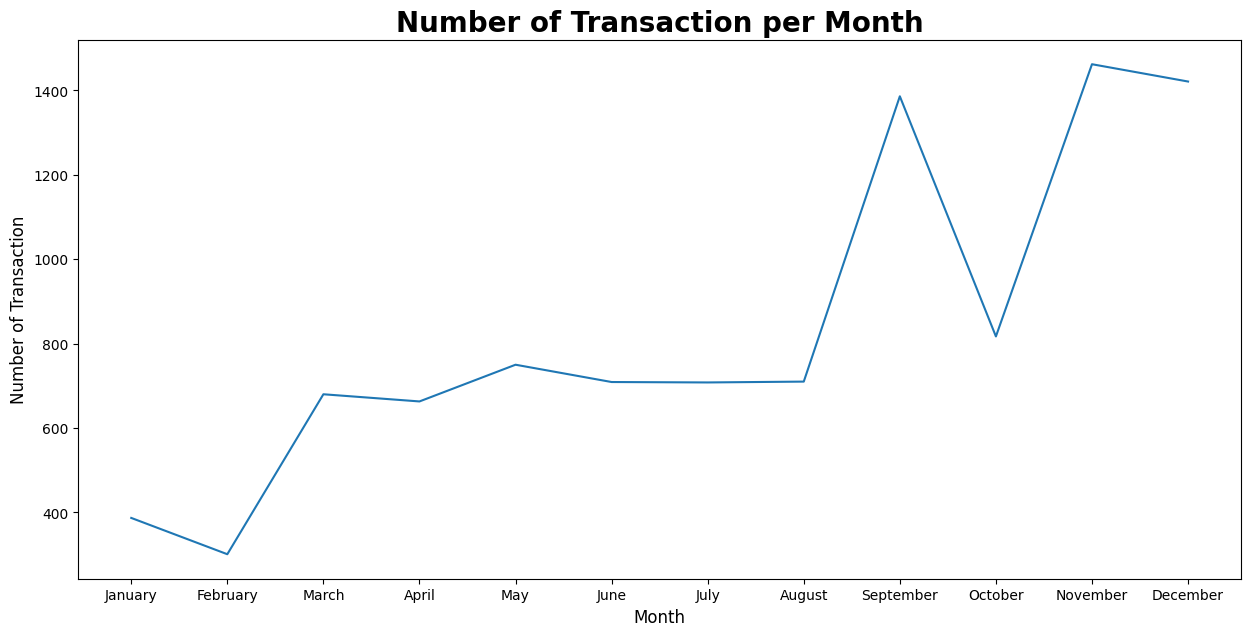

In [42]:
# visualization
fig = plt.figure(figsize=(15,7))

sns.lineplot(
    data = transaction_per_month,
    x = 'month',
    y = 'number_of_transaction'
)

plt.title('Number of Transaction per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transaction', fontsize=12)
plt.show()

Transaksi cenderung mengalami kenaikan yang **stabil dari bulan februari sampai agustus** dan mengalami **kenaikan yang signifikan di bulan september**. Lalu transaksi mengalami **penurunan yang drastis di bulan oktober**. Namun setelah itu transaksi mengalami **kenaikan yang signifikan di bulan november**. Perlu dilakukan analisis lebih lanjut mengenai hal ini.

#### 3.1.3 Number of Transaction per Day

In [43]:
month_daily_transaction = df_transaction.groupby(['transaction_month', 'transaction_day'])['Order ID'].count().reset_index()
month_daily_transaction.columns = ['month', 'day', 'number_of_transaction']

# order by month 
month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month', 'day'], inplace=True)
month_daily_transaction

,month,day,number_of_transaction
121,January,01,7
122,January,02,20
123,January,03,18
124,January,04,10
125,January,05,12
...,...,...,...
87,December,27,55
88,December,28,17
89,December,29,36
90,December,30,42


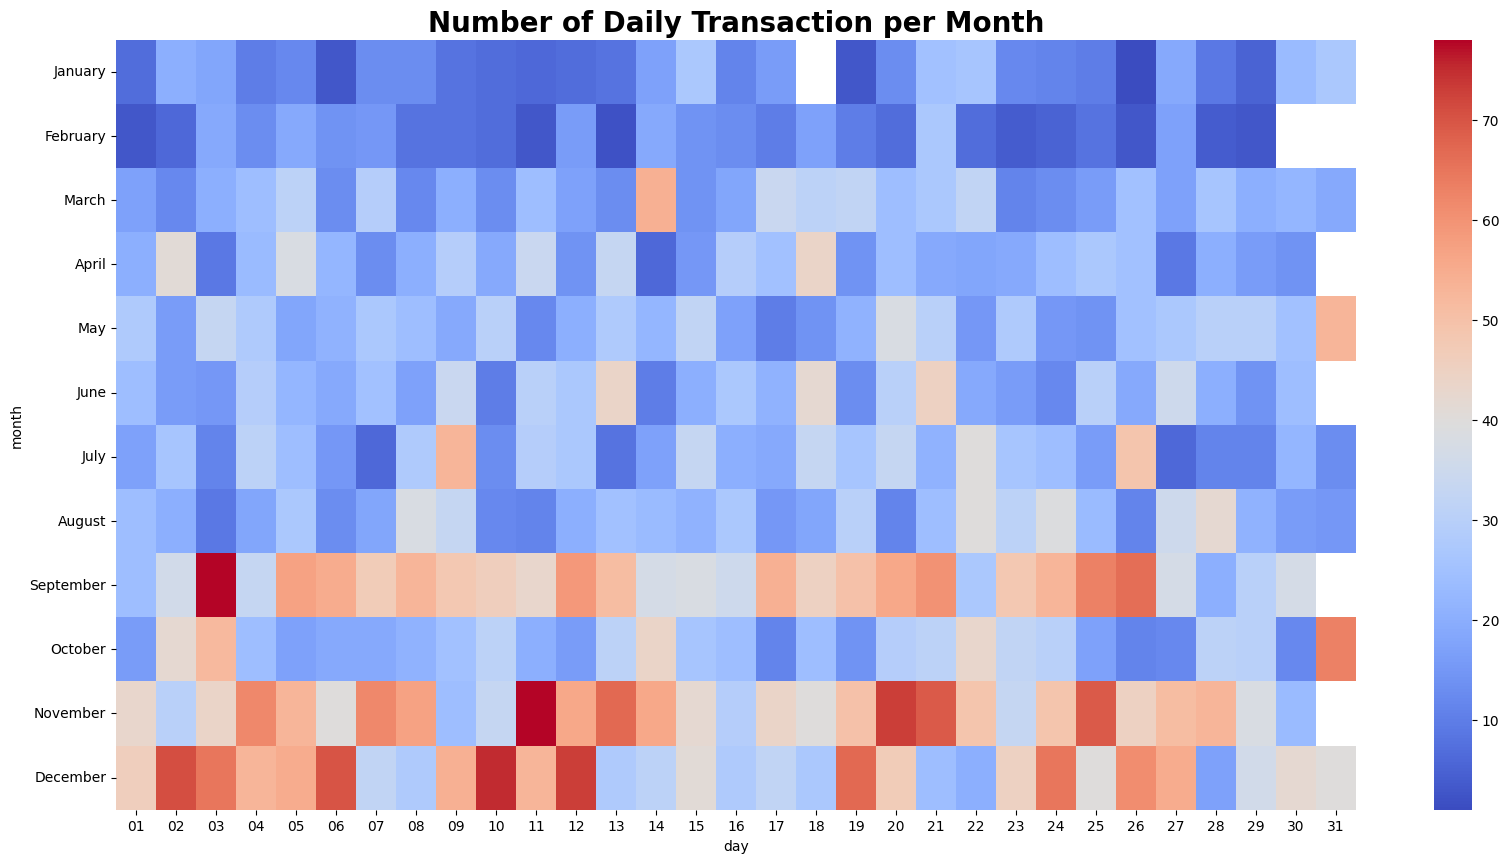

In [44]:
fig = plt.figure(figsize=(20,10))

map = month_daily_transaction.pivot(index='month', columns='day', values='number_of_transaction')
sns.heatmap(map, cmap='coolwarm')

plt.title('Number of Daily Transaction per Month', fontsize=20, fontweight='bold')
plt.show()

Tren transaksi harian fluktuatif namun mengalami kenaikan pada akhir tahun. Transaksi **terbesar terjadi pada tanggal 3 September dan 11 November**.

#### 3.1.4 Daily Transaction Trend

In [45]:
daily_transaction = df_transaction.groupby('transaction_weekday')['Customer ID'].count().reset_index()
daily_transaction.columns = ['days', 'count']

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['days'] = pd.Categorical(daily_transaction['days'], days_order)
daily_transaction.sort_values('days', inplace=True)
daily_transaction

,days,count
1,Monday,1812
5,Tuesday,1780
6,Wednesday,1601
4,Thursday,1805
0,Friday,1837
2,Saturday,970
3,Sunday,189


C:\Users\dicki\AppData\Local\Temp\ipykernel_13168\2891381138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


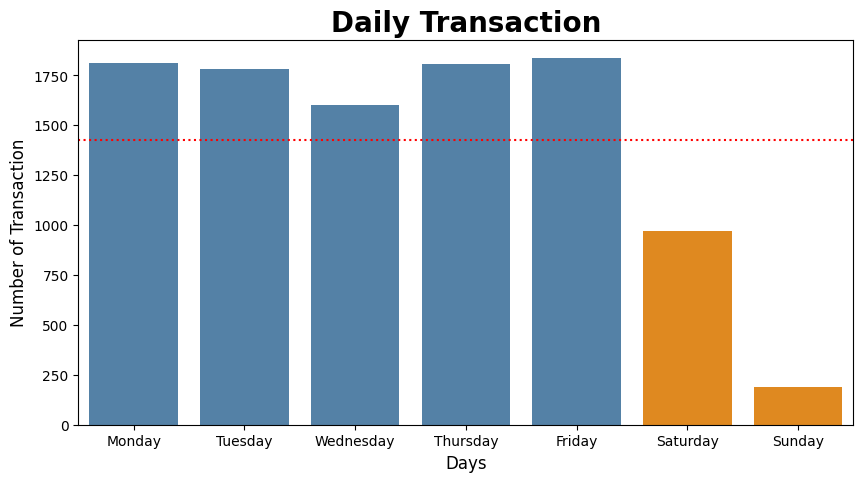

In [46]:
fig = plt.figure(figsize=(10,5))

mean = daily_transaction['count'].mean()

colors = []
for value in daily_transaction['count']:
    if value < mean:
        colors.append('darkorange')
    else:
        colors.append('steelblue')

sns.barplot(
    data = daily_transaction,
    x = 'days',
    y = 'count',
    palette = colors
)

plt.axhline(y=mean, color='r', linestyle=':')

plt.title('Daily Transaction', fontsize=20, fontweight='bold')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Transaction', fontsize=12)

plt.show()

- Transaksi menurun signifikan di hari libur
- **Jumat** adalah hari paling banyak **transaksi**

### 3.2. Product Data

In [47]:
df_product = df.iloc[:,-8:]
df_product.sample(2)

,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9325,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,72.96,3,0.2,23.7120
6158,TEC-AC-10004803,Technology,Accessories,Sony Micro Vault Click 4 GB USB 2.0 Flash Drive,167.28,12,0.0,23.4192


#### 3.2.1 Statistical Summary

In [48]:
stats = df_product[['Category', 'Sub-Category', 'Product Name']].describe().T
stats['% top'] = 100 * (stats['freq']/stats['count'])
stats

,count,unique,top,freq,% top
Category,9994,3,Office Supplies,6026,60.296178
Sub-Category,9994,17,Binders,1523,15.239143
Product Name,9994,1841,Staples,227,2.271363


- Category paling banyak dibeli adalah **office supplies** denngan 60% dari total transaksi
- **15.29%** dari customer membeli di sub category **binders**
- **2.27%** dari customer membeli **staples**

#### 3.2.2 Sales and Profit by Category

In [49]:
best_selling_product = df_product.groupby('Category').agg(
    Sales=('Sales', 'sum'),
    Profit=('Profit', 'sum')
).sort_values(by='Sales',ascending=False).reset_index()
#best_selling_product['% Sales'] = (best_selling_product['Sales']/best_selling_product['Sales'].sum() *100).round(2)
#best_selling_product['% Profit'] = (best_selling_product['Profit']/best_selling_product['Profit'].sum() *100).round(2)

best_selling_product

,Category,Sales,Profit
0,Technology,836154.0330,145454.9481
1,Furniture,741999.7953,18451.2728
2,Office Supplies,719047.0320,122490.8008


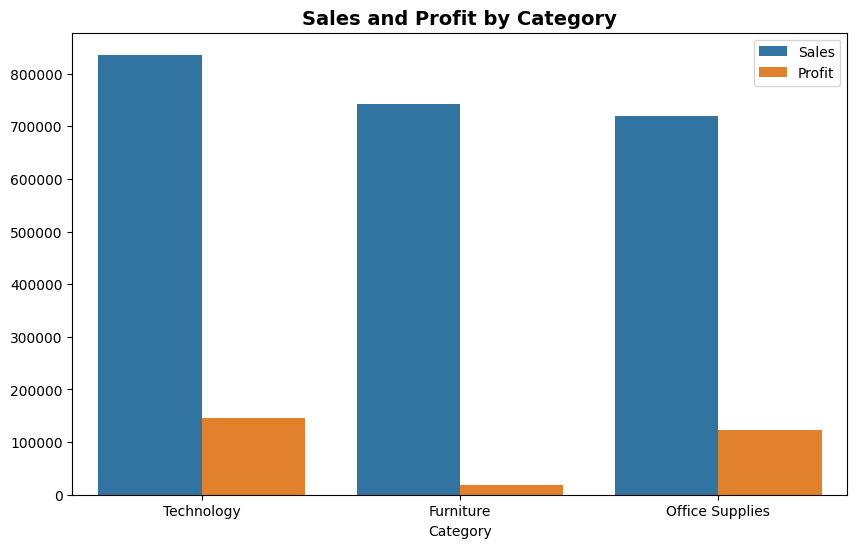

In [50]:
plt.figure(figsize=(10,6))
data_melt  = pd.melt(best_selling_product, id_vars='Category')

sns.barplot(
    data = data_melt,
    x = 'Category',
    y = 'value',
    hue = 'variable'
)

plt.title('Sales and Profit by Category', fontsize=14, fontweight='bold')
plt.ylabel(None)
plt.legend()
plt.show()

- **Technology** menghasilkan **sales dan profit** paling tinggi
- Meskipun **sales** furniture dan office supplies tidak jauh berbeda, tetapi **ada perbedaan signifikan pada profit**

### 3.3. Customer Data

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [70]:
data_cust = df.iloc[:,4:12]
data_cust.head()

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
2,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
3,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
4,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South


#### 3.3.1 Statistical Summary

In [53]:
cust_stat = data_cust[['Customer Name', 'Segment', 'City', 'State', 'Region']].describe().T
cust_stat['% top'] = cust_stat['freq']/cust_stat['count']* 100
cust_stat

,count,unique,top,freq,% top
Customer Name,9994,793,William Brown,37,0.370222
Segment,9994,3,Consumer,5191,51.941165
City,9994,531,New York City,915,9.155493
State,9994,49,California,2001,20.022013
Region,9994,4,West,3203,32.04923


- **William Brown** merupakan customer yang paling sering bertransaksi
- **51.94%** pelanggan berada pada segment **consumer**
- **20.02%** pelanggan tinggal di **California**
- **32.04%** pelanggan berasal dari **West Region**

## 4. RFM Analysis

### 4.1. Data Preparation

Sebelum melakukan analisis ini, kita harus mencari nilai recency, frequency, dan monetary. Untuk mendapatkan nilai recency kita menghitung hari terakhir transaksi dari **Order Date** dan nilai monetary dari **Sales**

In [54]:
data_rfm = df.copy()
data_rfm.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2013-152156,2013-11-09,2013-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2013-138688,2013-06-13,2013-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [55]:
# Asumsikan bahwa hari terakhir order adalah tanggal maksimum dari dataset
recent_purchase = data_rfm['Order Date'].max()
data_rfm['days_since_last_order'] = (recent_purchase - data_rfm['Order Date']).dt.days


### 4.2. Data Aggregation

In [56]:
rfm_table = data_rfm.groupby('Customer ID', as_index=True).agg(
    recency=('days_since_last_order', 'min'),
    frequency=('Order ID','nunique'),
    monetary=('Sales', 'sum')
)

rfm_table.head()

,recency,frequency,monetary
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156


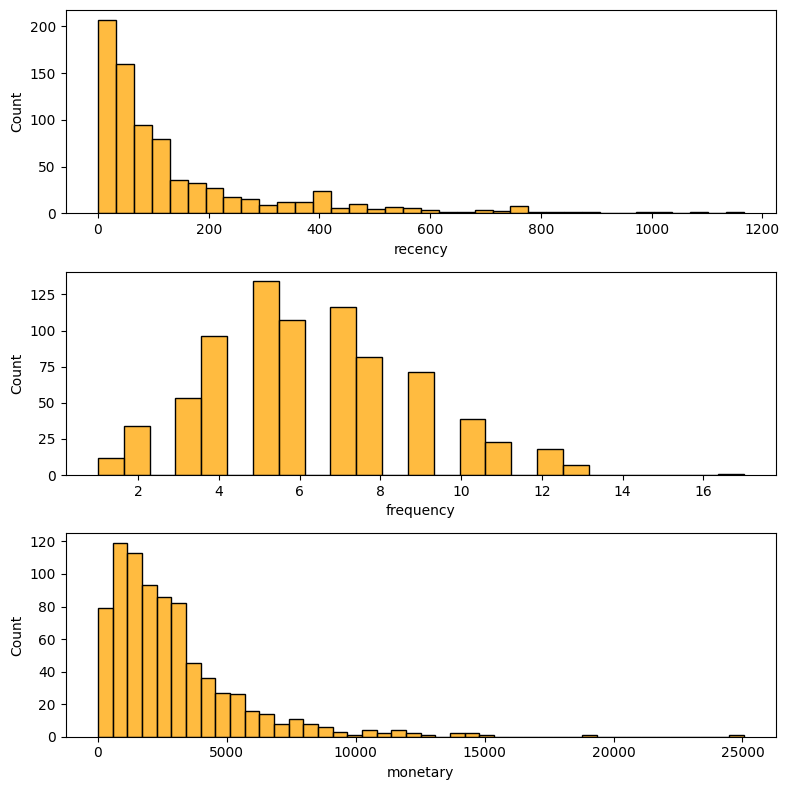

In [57]:
# looking distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.histplot(rfm_table[rfm[i]], color='orange')
    plt.tight_layout()

### 4.3. Scoring

Buat scoring menggunakan qcut yang menghitung nilai berdasarkan quartil. Hasil score antara 1 sampai 5. Customer menerima point besar apabila mereka sering bertransaksi dan menghabiskan banyak uang.

Sistem scoring dijelaskan sebagai berikut
- Recency score = Mendapatkan **nilai 5** apabila **transaksi terjadi akhir-akhir ini**, apabila **makin lama** mendapatkan **nilai 1**
- Frequency score = Makin **sering berbelanja** mendapatkan **nilai 5**, makin **sedikit** mendapatkan **nilai 1**
- Monetary score = **paling banyak** menghabiskan uang mendapatkan **nilai 5**, **paling sedikit** mendapatkan **nilai 1**

In [58]:
rfm_table['recency_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

rfm_table['frequency_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm_table['monetary_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
AA-10315,184,5,5563.560,2,2,5
AA-10375,19,9,1056.390,5,5,2
AA-10480,259,4,1790.512,1,1,3
AA-10645,55,6,5086.935,3,3,5
AB-10015,415,3,886.156,1,1,1


Menghitung RFM score dapat dilakukan dengan menghitung rata-rata nilai dari masing-masing (recency, frequency, monetary)

In [59]:
# RFM score
rfm_table['RFM_score'] = ((rfm_table['recency_score'] + rfm_table['frequency_score'] + rfm_table['monetary_score']) / 3).round(2)

In [60]:
rfm_table.sample(4)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
Customer ID,,,,,,,
DM-13525,481,3,1376.792,1,1,2,1.33
AA-10375,19,9,1056.390,5,5,2,4.00
GD-14590,5,4,1888.070,5,1,3,3.00
SN-20560,111,6,1860.418,2,3,3,2.67


### 4.4 Segmentation

In [61]:
rfm_table['RFM_segment'] = np.select(
    [(rfm_table['recency_score']==5) & (rfm_table['frequency_score']>=4),
     (rfm_table['recency_score'].between(3,4)) & (rfm_table['frequency_score']>=4),
     (rfm_table['recency_score']>=4) & (rfm_table['frequency_score'].between(2,3)),
     (rfm_table['recency_score']<=2) & (rfm_table['frequency_score']==5),
     (rfm_table['recency_score']==3) & (rfm_table['frequency_score']==3),
     (rfm_table['recency_score']==5) & (rfm_table['frequency_score']==1),
     (rfm_table['recency_score']==4) & (rfm_table['frequency_score']==1),
     (rfm_table['recency_score']<=2) & (rfm_table['frequency_score'].between(3,4)),
     (rfm_table['recency_score']==3) & (rfm_table['frequency_score']<=2),
     (rfm_table['recency_score']<=2) & (rfm_table['frequency_score']<=2)],
    ['Champion', 'Loyal Customers', 'Potential Loyalists', "Can't Lose Them", 'Need Attention',
     'New Customers', 'Promising', 'At Risk', 'About to Sleep', 'Hibernating']
)
rfm_table.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score,RFM_segment
Customer ID,,,,,,,,
AA-10315,184,5,5563.560,2,2,5,3.00,Hibernating
AA-10375,19,9,1056.390,5,5,2,4.00,Champion
AA-10480,259,4,1790.512,1,1,3,1.67,Hibernating
AA-10645,55,6,5086.935,3,3,5,3.67,Need Attention
AB-10015,415,3,886.156,1,1,1,1.00,Hibernating


### 4.5. Analysis

#### 4.5.1 Statisical Summary

In [62]:
df_rfm = rfm_table.reset_index()

In [63]:
df_rfm.describe()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,146.805801,6.316520,2896.848500,3.006305,3.000000,3.000000,3.002043
std,186.231107,2.550885,2628.670117,1.419991,1.415998,1.415998,1.067044
min,0.000000,1.000000,4.833000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,5.000000,1146.050000,2.000000,2.000000,2.000000,2.330000
50%,75.000000,6.000000,2256.394000,3.000000,3.000000,3.000000,3.000000
75%,183.000000,8.000000,3785.276000,4.000000,4.000000,4.000000,3.670000
max,1166.000000,17.000000,25043.050000,5.000000,5.000000,5.000000,5.000000


In [64]:
summary = df_rfm.groupby('RFM_segment', as_index=False).agg(
    count=('Customer ID', 'count'),
    recency=('recency', 'mean'),
    frequency=('frequency', 'mean'),
    monetary=('monetary', 'mean')
).round(2)

summary['count %'] = ((summary['count'] / summary['count'].sum()) * 100).round(2)
summary['monetary %'] = ((summary['monetary'] / summary['monetary'].sum()) * 100).round(2)
summary.sort_values('count', ascending=False)

,RFM_segment,count,recency,frequency,monetary,count %,monetary %
4,Hibernating,171,376.57,3.71,1684.11,21.56,6.04
5,Loyal Customers,149,55.81,8.73,3903.66,18.79,14.01
8,Potential Loyalists,112,26.32,5.62,2647.32,14.12,9.50
1,At Risk,106,223.40,6.57,3099.03,13.37,11.12
3,Champion,88,13.26,9.06,3933.23,11.10,14.11
0,About to Sleep,57,73.44,4.00,2486.86,7.19,8.92
2,Can't Lose Them,39,210.87,9.97,4257.52,4.92,15.28
6,Need Attention,32,79.00,6.41,2914.02,4.04,10.46
7,New Customers,22,13.86,3.27,1082.29,2.77,3.88
9,Promising,17,39.41,3.29,1858.69,2.14,6.67


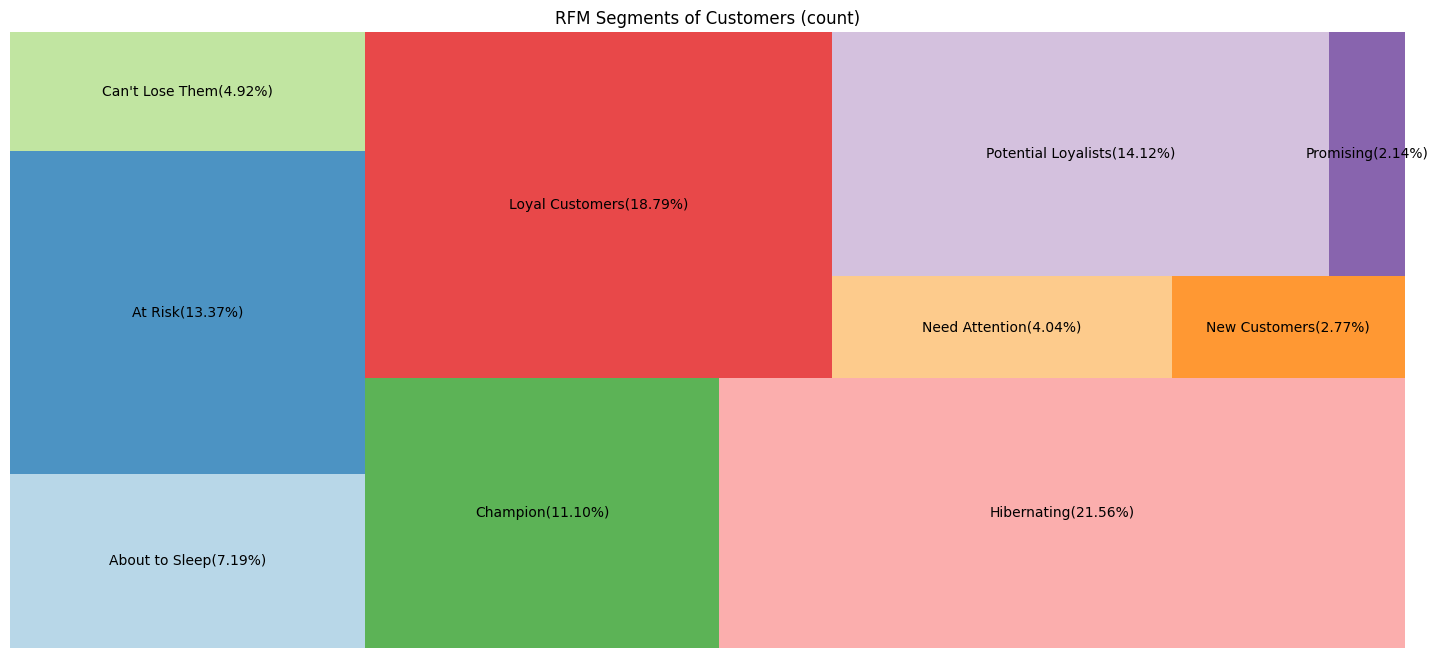

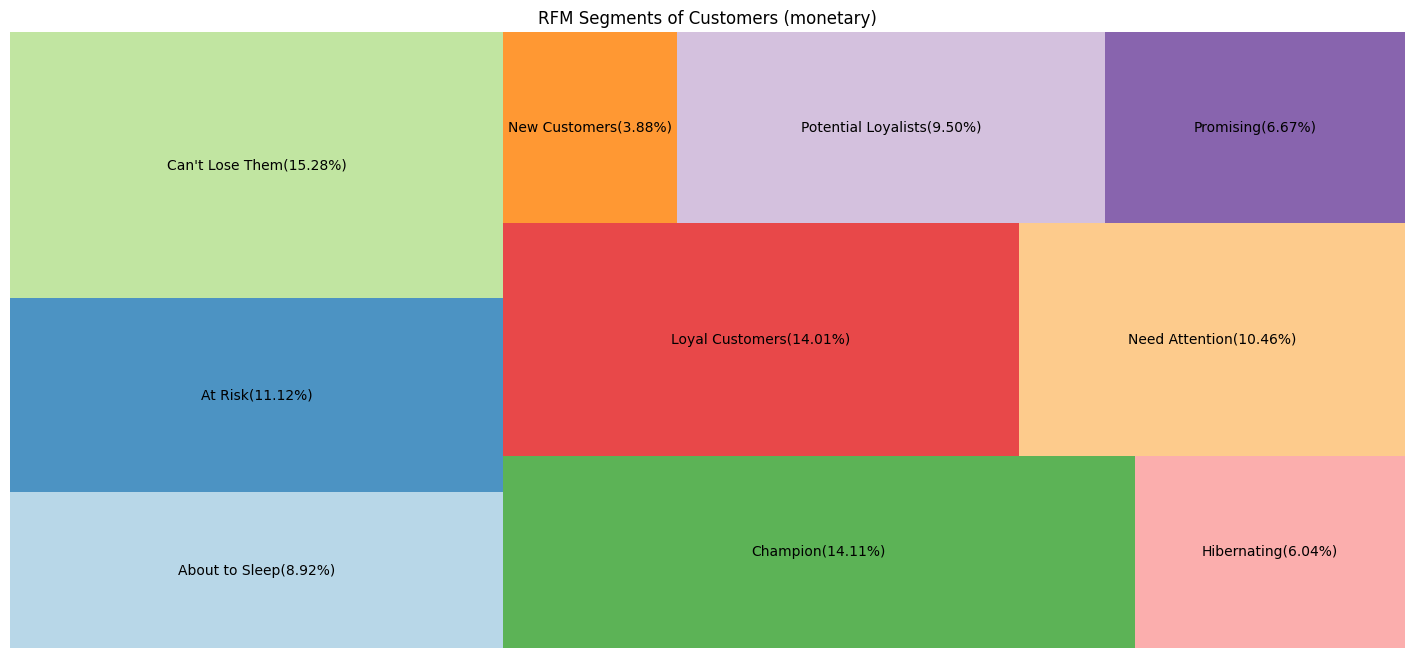

In [65]:
import squarify

for col in ['count', 'monetary']:
    labels = summary['RFM_segment'] + summary[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=summary[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(summary)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

- **Pelanggan paling banyak** berada pada segmen **Hibernating (21.56%), Loyal Customer (18.79%), dan Potential Loyalist (14.12%)**
- **Hibernating** menjadi segment **terbesar** dengan 171 customer (21.56%) dengan rata-rata terakhir pembelian yaitu 376 hari atau lebih dari 1 tahun lalu.
- **Sales tertinggi** berada pada segmen **Can't loose them (15,28%)** dan **Champion (14.11%)**

## 5. Recomendation

Keseluruhan :
- Mengingat transaksi yang paling sedikit terjadi pada hari Sabtu dan Minggu, dapat dibuatkan program khusus seperti "Weekend Sale."
- Dengan sebagian besar pelanggan berada di California, mungkin layak untuk meluncurkan promosi khusus di wilayah tersebut.


Berdasarkan jumlah pelanggan, segment paling besar yaitu Hibernating, Loyal Customer, dan Potential Analyts. Berikut beberapa hal yang bisa dilakukan:
- **Hibernating** : Program khusus seperti diskon dapat diciptakan sehingga mendorong mereka untuk melakukan transaksi kembali walaupun belum begitu sering sehingga bisa naik ke segment New Customer bahkan Potential Loyalist.
- **Loyal Customer** : Tawarkan produk-produk baru berdasarkan pembelian sebelumnya.
- **Potential Loyalist** : Buatkan mereka program seperti bundling program sehingga mereka dapat sering bertransaksi.

Berdasarkan sales dari pelanggan, segment paling besar yaitu **Can't Loose Them** dan **Champion**. Berikut beberapa hal yang bisa dilakukan
- Tawarkan penawaran waktu terbatas dan rekomendasikan berdasarkan pembelian sebelumnya.
- Jual produk bernilai lebih tinggi dan ajak mereka untuk meberikan ulasan positif.